In [28]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Load the data
df = pd.read_csv("dataset_social_technical_1d.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

target_variable = ['price_pct_variation']
num_features = df.loc[:, df.columns != 'date'].columns
features_list = num_features


/tmp/ipykernel_813/1700995032.py:10: UserWarning: Parsing '13/01/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_813/1700995032.py:10: UserWarning: Parsing '16/01/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_813/1700995032.py:10: UserWarning: Parsing '17/01/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_813/1700995032.py:10: UserWarning: Parsing '18/01/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_813/1700995032.py:10: UserWarning: Parsing '19/01/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for co

In [29]:
!pip install xgboost

In [30]:
features_list = list(features_list)

In [31]:
features_list.remove('price_pct_variation')

In [32]:
features_list

['SMA_ratio',
 'SMA_Volume_Ratio',
 'Stochastic_15',
 'Stochastic_Ratio',
 'RSI_15',
 'RSI_ratio',
 'MACD',
 'title_vader_compound',
 'title_roberta_neg',
 'title_roberta_neu',
 'title_roberta_pos']

In [33]:

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X = df[features_list]
y = df[target_variable]


Dividing into train and test sets...


In [34]:

# Splitting
#train_X, test_X, train_y, test_y = train_test_split(X, y,
#                      test_size = 0.3, random_state = 123)
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X = df[features_list]
y = df[target_variable]

train_X = X[:800]
test_X = X[800:]
train_y = y[:800]
test_y = y[800:]

# X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("...Done.")
print()
 

Dividing into train and test sets...
...Done.



In [35]:

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 123)


In [36]:

# Fitting the model
xgb_r.fit(train_X, train_y)
 

[10:30:21] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [37]:

# Predict the model
pred = xgb_r.predict(test_X)


In [38]:

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))


RMSE :  0.021409


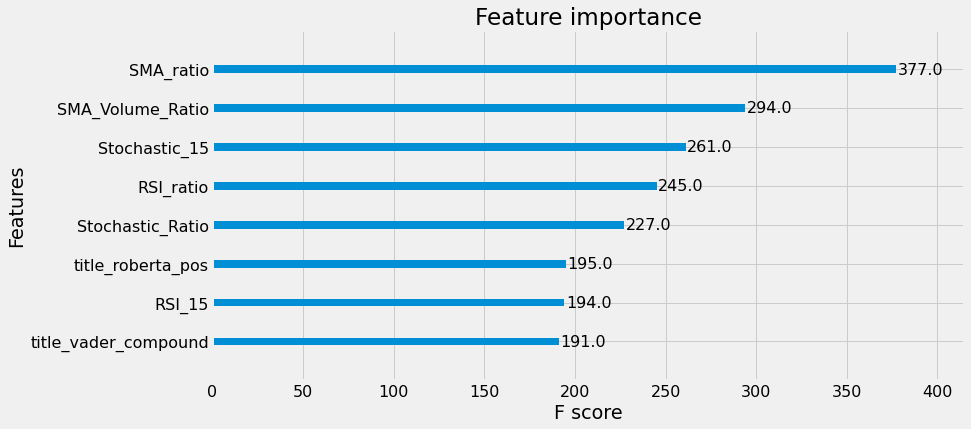

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_r, max_num_features=8, ax=ax)
plt.show();


In [40]:
features_list = list(num_features)

<AxesSubplot:xlabel='price_pct_variation'>

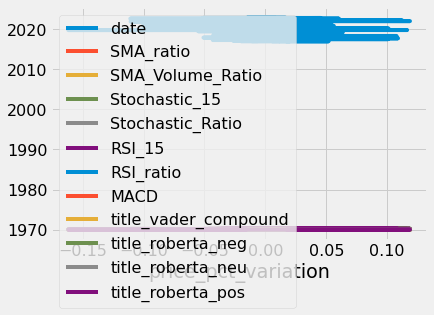

In [41]:
df.plot('price_pct_variation')

In [42]:
# First only with vader features
features_list.remove('price_pct_variation')
features_list.remove('title_roberta_neg')
features_list.remove('title_roberta_neu')
features_list.remove('title_roberta_pos')


In [43]:
features_list

['SMA_ratio',
 'SMA_Volume_Ratio',
 'Stochastic_15',
 'Stochastic_Ratio',
 'RSI_15',
 'RSI_ratio',
 'MACD',
 'title_vader_compound']

In [45]:

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X = df[features_list]
y = df[target_variable]

train_X = X[:800]
test_X = X[800:]
train_y = y[:800]
test_y = y[800:]

# X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("...Done.")
print()
 

Dividing into train and test sets...
...Done.



In [46]:

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

In [47]:
# Fitting the model
xgb_r.fit(train_X, train_y)

[10:31:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [48]:
# Predict the model
pred = xgb_r.predict(test_X)

In [49]:

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))


RMSE :  0.025043


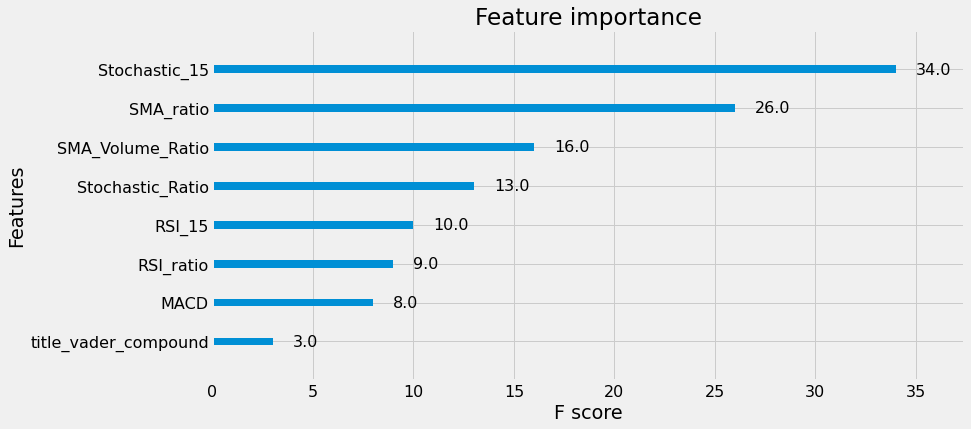

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_r, max_num_features=8, ax=ax)
plt.show();


In [51]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.03216294450570556

In [52]:
r2_score(test_y, pred)

0.03216294450570556

In [53]:
pred_train = xgb_r.predict(train_X)

In [54]:
r2_score(train_y, pred_train)

0.16533235088597464

In [55]:
r2_score(test_y, pred)

0.03216294450570556

In [56]:
# Now only with roberta
features_list = list(num_features)
features_list.remove('price_pct_variation')
features_list.remove('title_vader_compound')


In [57]:
features_list

['SMA_ratio',
 'SMA_Volume_Ratio',
 'Stochastic_15',
 'Stochastic_Ratio',
 'RSI_15',
 'RSI_ratio',
 'MACD',
 'title_roberta_neg',
 'title_roberta_neu',
 'title_roberta_pos']

In [58]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X = df[features_list]
y = df[target_variable]

train_X = X[:800]
test_X = X[800:]
train_y = y[:800]
test_y = y[800:]

# X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("...Done.")
print()
 

Dividing into train and test sets...
...Done.



In [59]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(train_X, train_y)

[10:33:54] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

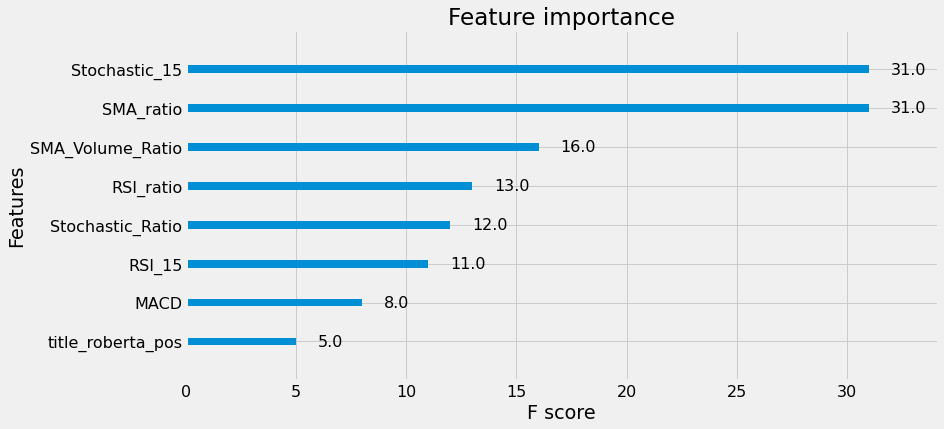

In [60]:
# Predict the model
y_test_pred = xgb_r.predict(test_X)
y_train_pred = xgb_r.predict(train_X)

from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_r, max_num_features=8, ax=ax)
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y, y_test_pred)
r2_score(test_y, y_test_pred)
